In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd    #data manipulation
import numpy as np   #data analysis (Provides support for large multi-dimensional arrays and mathematical functions)
import seaborn as sns  #visualization
import matplotlib.pyplot as plt  #visualization


from sklearn.model_selection import train_test_split  #Splits dataset into training and testing subsets for machine learning
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score #evaluate the performance of regression models
from sklearn.preprocessing import StandardScaler  # removing the mean and scaling

In [2]:
df = pd.read_csv("Lung Cancer.csv")  # pandas opens and reads the CSV file

In [3]:
print("Original column headers: ")
print(list(df.columns))

Original column headers: 
['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']


In [4]:
df.shape #Check the dimension of the DataFrame

(890000, 17)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [6]:
df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [7]:
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicated rows: ",duplicate_rows_df.shape)

Number of duplicated rows:  (0, 17)


In [24]:
import pandas as pd 
from imblearn.under_sampling import RandomUnderSampler #handling class imbalance by reducing majority class
from collections import Counter


print("Original class distribution:", Counter(df['survived'])) #access target column

# Features and target
X = df.drop('survived', axis=1) #create feature metrix removing target
y = df['survived'] #target vector create

# Apply Random UnderSampling
rus = RandomUnderSampler(random_state=42) #create object under sampaling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create balanced DataFrame
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

print("Balanced class distribution:", Counter(y_resampled))

# Save to CSV
df_balanced.to_csv("IT24510004_lung_cancer_balanced.csv", index=False) #prevent saving as column

Original class distribution: Counter({0: 693996, 1: 196004})
Balanced class distribution: Counter({0: 196004, 1: 196004})


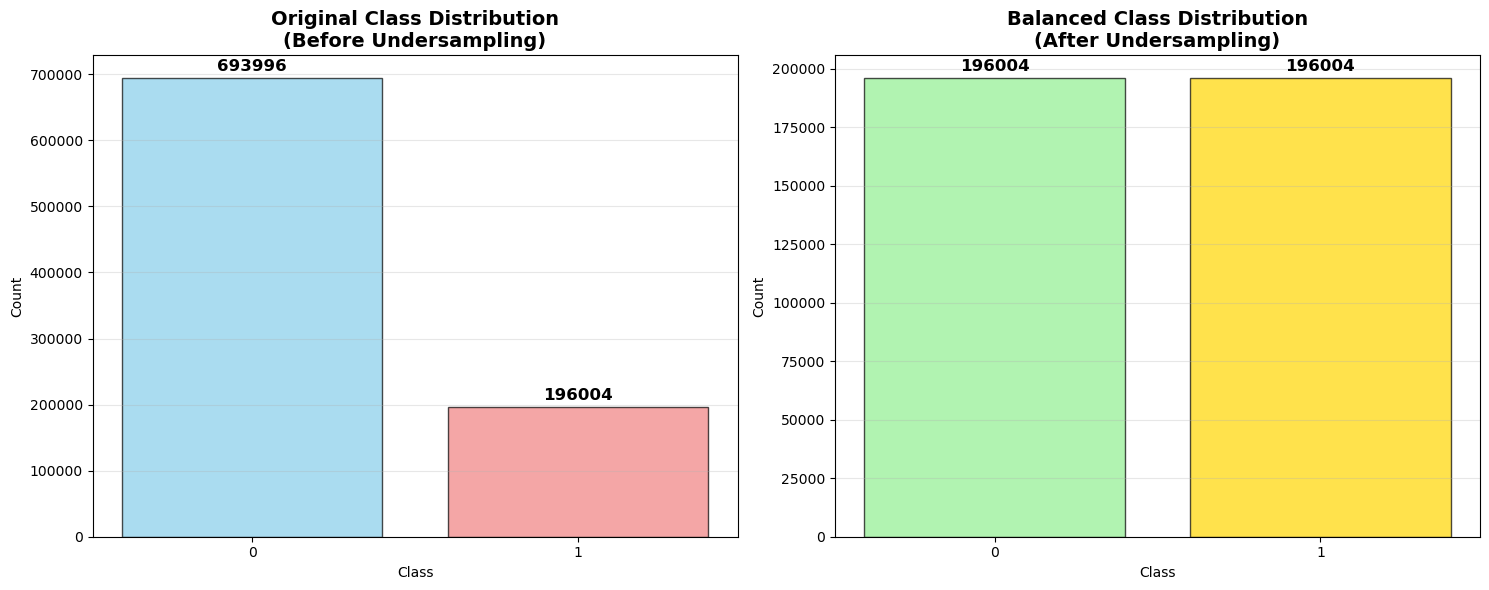

In [19]:
import matplotlib.pyplot as plt #ploting library
import seaborn as sns #matplotlib visualization
import numpy as np 
from collections import Counter #For counting class frequencies

# Set style for better visualizations
plt.style.use('default') #Use matplotlib's default style
sns.set_palette("husl") #use seaboarn

# Visualization 1: Class Distribution Comparison (Before vs After)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) #1raw 2columns

# Original distribution
original_counts = Counter(y) #y is original target variable
ax1.bar([str(k) for k in original_counts.keys()], original_counts.values(), 
        color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
ax1.set_title('Original Class Distribution\n(Before Undersampling)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)
for i, (class_label, count) in enumerate(original_counts.items()):   #Loop through class-count pairs with index
    ax1.text(i, count + max(original_counts.values())*0.01, str(count), #The count number as text
             ha='center', va='bottom', fontweight='bold', fontsize=12) #Display exact count values on bars

# Balanced distribution
balanced_counts = Counter(y_resampled) #Display exact count values on bars
ax2.bar([str(k) for k in balanced_counts.keys()], balanced_counts.values(), 
        color=['lightgreen', 'gold'], alpha=0.7, edgecolor='black')
ax2.set_title('Balanced Class Distribution\n(After Undersampling)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.grid(axis='y', alpha=0.3)
for i, (class_label, count) in enumerate(balanced_counts.items()):       #Add value labels to balanced distribution bars
    ax2.text(i, count + max(balanced_counts.values())*0.01, str(count), 
             ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()



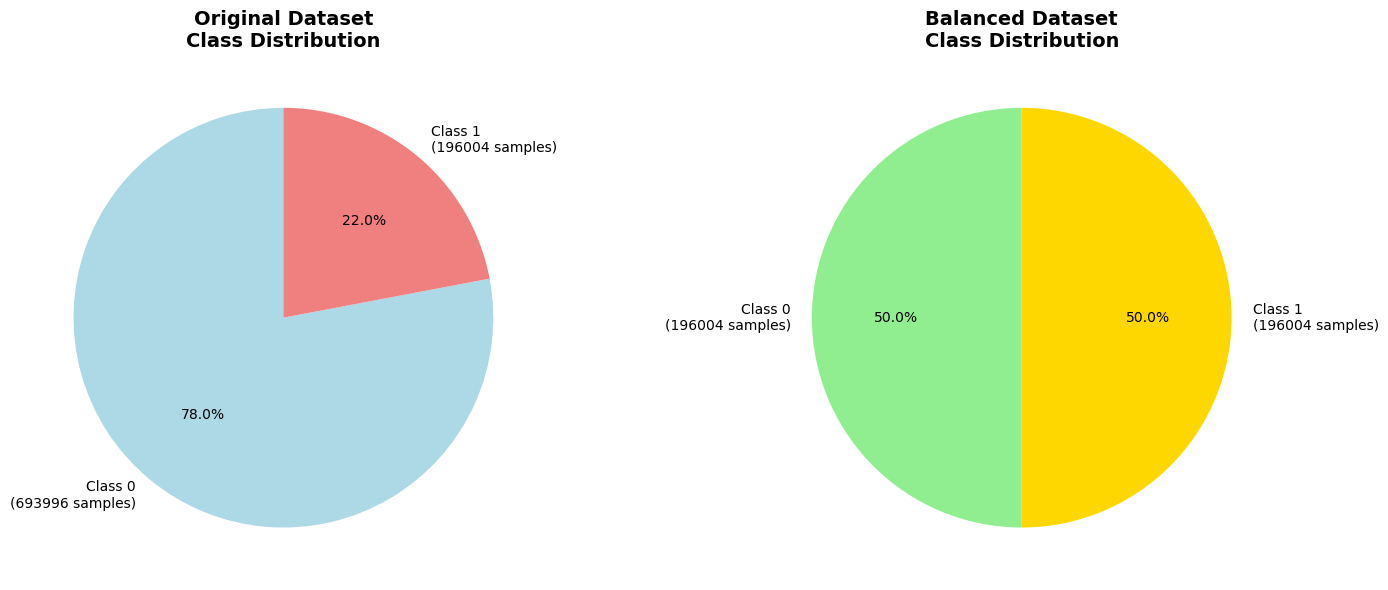

In [20]:
# Visualization 2: Pie Charts Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  #15 inches wide × 6 inches tall

# Original pie chart
ax1.pie(original_counts.values(),   #The class counts as pie slice sizes
        labels=[f'Class {idx}\n({count} samples)' for idx, count in original_counts.items()], #Create custom labels for each pie slice 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'],
        textprops={'fontsize': 10})
ax1.set_title('Original Dataset\nClass Distribution', fontsize=14, fontweight='bold')

# Balanced pie chart
ax2.pie(balanced_counts.values(), 
        labels=[f'Class {idx}\n({count} samples)' for idx, count in balanced_counts.items()], 
        autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold'],
        textprops={'fontsize': 10})   #Set font size to 10 for all text in the pie chart
ax2.set_title('Balanced Dataset\nClass Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



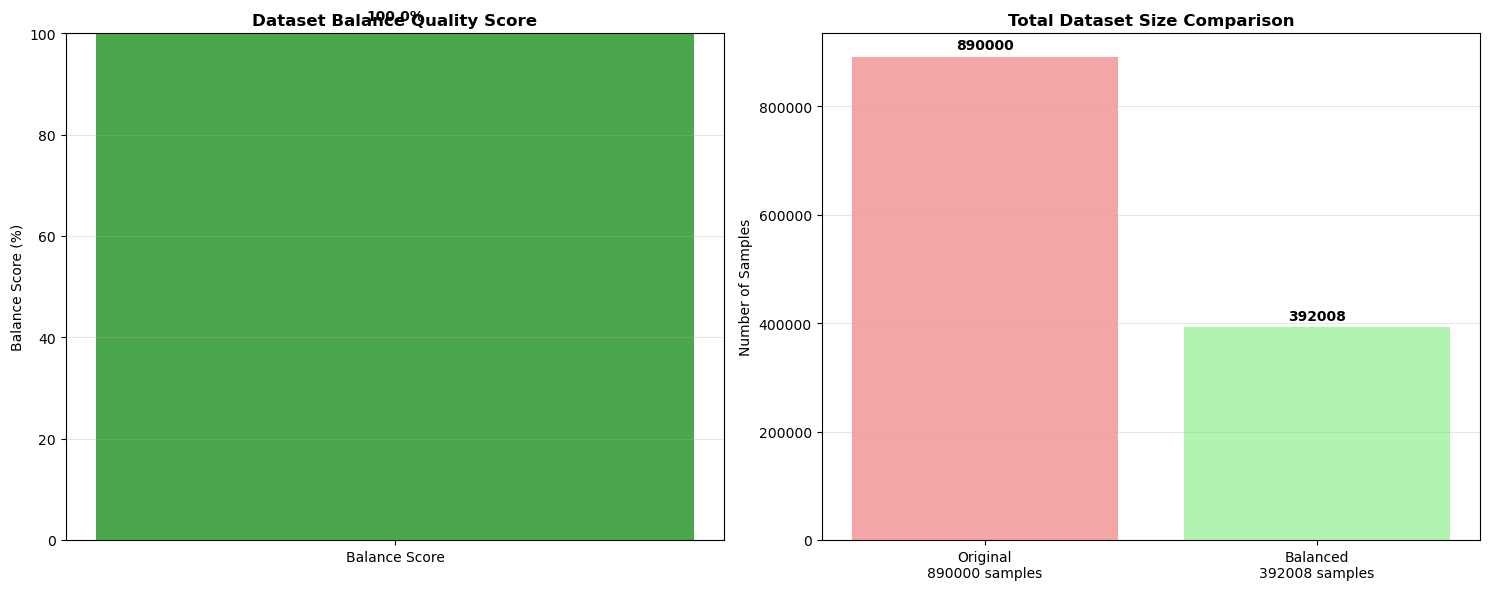

In [21]:
# Visualization 6: Balanced Dataset Quality Check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Balance quality metric   Calculate the balance quality score
balance_ratio = min(balanced_counts.values()) / max(balanced_counts.values())
balance_score = balance_ratio * 100

ax1.bar(['Balance Score'], [balance_score], color=['green' if balance_score > 95 else 'orange'], alpha=0.7)
ax1.set_ylim(0, 100)
ax1.set_ylabel('Balance Score (%)')
ax1.set_title('Dataset Balance Quality Score', fontweight='bold')
ax1.text(0, balance_score + 2, f'{balance_score:.1f}%', ha='center', va='bottom', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)   #Add horizontal grid lines

# Sample size comparison
sizes = [len(df), len(df_balanced)]    #List containing [original_size, balanced_size]
labels = [f'Original\n{sizes[0]} samples', f'Balanced\n{sizes[1]} samples']
ax2.bar(labels, sizes, color=['lightcoral', 'lightgreen'], alpha=0.7)
ax2.set_ylabel('Number of Samples')
ax2.set_title('Total Dataset Size Comparison', fontweight='bold')
for i, v in enumerate(sizes):   #Loop through sizes with index
    ax2.text(i, v + max(sizes)*0.01, f'{v}', ha='center', va='bottom', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()   #Finalize and display the plots
plt.show()

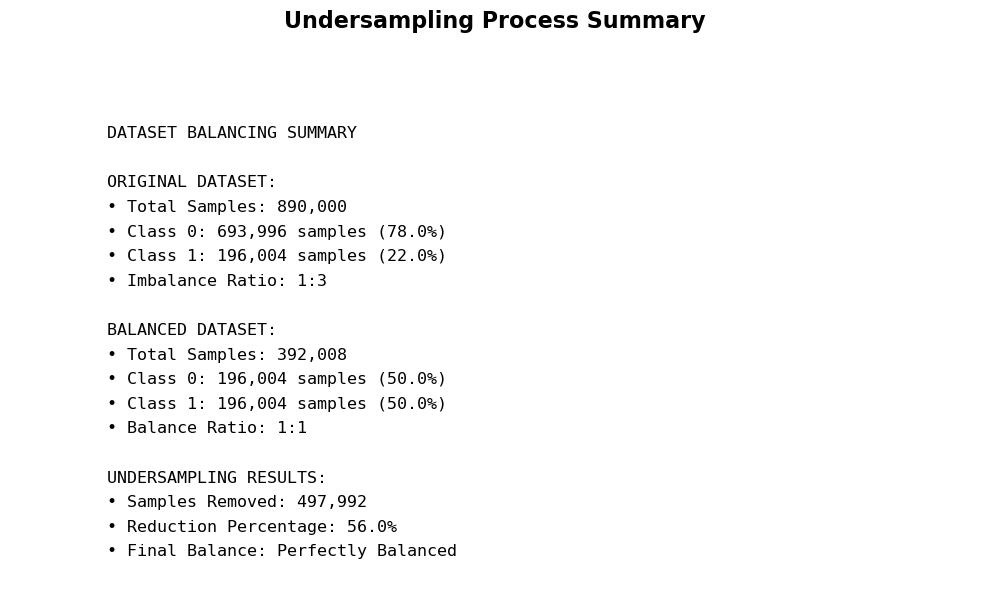

In [22]:
# Visualization 4: Dataset Statistics Summary
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  #Turn off the axes (no x/y axes, borders, or ticks)

# Allows multi-line string
summary_text = f"""   
DATASET BALANCING SUMMARY

ORIGINAL DATASET:
• Total Samples: {len(df):,}
• Class 0: {original_counts[0]:,} samples ({original_counts[0]/len(df)*100:.1f}%)  
• Class 1: {original_counts[1]:,} samples ({original_counts[1]/len(df)*100:.1f}%)
• Imbalance Ratio: 1:{original_counts[0]//original_counts[1]}

BALANCED DATASET:
• Total Samples: {len(df_balanced):,}
• Class 0: {balanced_counts[0]:,} samples ({balanced_counts[0]/len(df_balanced)*100:.1f}%)
• Class 1: {balanced_counts[1]:,} samples ({balanced_counts[1]/len(df_balanced)*100:.1f}%)
• Balance Ratio: 1:{balanced_counts[0]//balanced_counts[1]}

UNDERSAMPLING RESULTS:
• Samples Removed: {len(df) - len(df_balanced):,}
• Reduction Percentage: {(1 - len(df_balanced)/len(df))*100:.1f}%
• Final Balance: {'Perfectly Balanced' if balanced_counts[0] == balanced_counts[1] else 'Well Balanced'}
"""

ax.text(0.1, 0.9, summary_text, fontsize=12, fontfamily='monospace',
        verticalalignment='top', linespacing=1.8, fontweight='normal')
ax.set_title('Undersampling Process Summary', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()